<a href="https://colab.research.google.com/github/shammi1988/Biking-Sharing-case-study/blob/main/healthcare_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycrf
!pip install sklearn-crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pycrf: filename=pycrf-0.0.1-py3-none-any.whl size=1898 sha256=884cb8060471d9928e500b27def24d98ffce700608aa63635eaed24ab1ff74ba
  Stored in directory: /root/.cache/pip/wheels/0b/68/37/a457e156cfd6174ed28c9c8cb76f18eeb559b760d84c0a22eb
Successfully built pycrf
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 4.9 MB/s 


In [2]:
import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics

model = spacy.load("en_core_web_sm")
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
def process_file(filename):
  input_file = open(filename, 'r')
  file_content = input_file.readlines() 
  input_file.close()
 
  out_lines = [] #To store list of sequences (sentences or labels)
 
  line_content = ""
 
  for word in file_content:
    word = word.strip() 
    if word == "": # If empty line, add the current sequence to out_lines
      out_lines.append(line_content)
      line_content = ""; # re-initialize
    else:
      if line_content: #if non-empty, add new word after space
        line_content += " "+word
      else:
        line_content = word # first word, no space required
 
  return out_lines

In [4]:
train_sentences = process_file('train_sent')
train_labels = process_file('train_label')
test_sentences = process_file('test_sent')
test_labels = process_file('test_label')

In [5]:
# Print the 5 sentences from the processed dataset
for i in range(5):
  print("Sentence:", train_sentences[i])
  print("Labels:", train_labels[i], "\n\n")

Sentence: All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )
Labels: O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 


Sentence: The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )
Labels: O O O O O O O O O O O O O O O O O O O O O O O O O 


Sentence: Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )
Labels: O O O O O O O O O O O O O O O 


Sentence: The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )
Labels: O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 


Sentence: Arrest of dilation was the most common indication in both `` co

In [7]:
# Print the 5 sentences from the processed dataset
for i in range(5):
  print("Sentence:", test_sentences[i])
  print("Labels:", test_labels[i], "\n\n")

Sentence: Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )
Labels: O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 


Sentence: As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration
Labels: O O O O O O O O O O O O O O O O O O O 


Sentence: The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period
Labels: O O O O O O O O O O O O O O O O O O O O O O O O 


Sentence: There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )
Labels: O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O 


Sentence: Fluctuations in ambient temperatu

### Count the number of sentences in the processed train and test dataset 




In [8]:
print("No. of lines in train_sentences:", len(train_sentences))
print("No. of lines in test_sentences:", len(test_sentences))

No. of lines in train_sentences: 2599
No. of lines in test_sentences: 1056


### Count the number of lines of labels in the processed train and test dataset.

In [20]:

print("No. of lines in train_sentences:", len(train_labels))
print("No. of lines in test_sentences:", len(test_labels))

No. of lines in train_sentences: 2599
No. of lines in test_sentences: 1056


the total number of sentences in train_sentences and the total number of lines in train_labels are the same and equal to 2599. Similarly, the total number of sentences in test_sentences and the total number of lines in test_labels are the same and equal to 1056, which means that the data preprocessing is done correctly.

##PoS Tags for Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging.

We will identify all the words from the corpus that have a tag of NOUN or PROPN (nouns) and prepare a dictionary of their counts. We will then output the top 25 most frequently discussed concepts in the entire corpus.

The key thing to check is that we are using both test and train sentences. Note that this is okay because we are using a pre-trained model and applying directly on our data. This is an exploratory analysis on the complete data. Since we are not training anything, there is no point is discarding information in test data

### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [10]:
## create Dictornary 
concepts = {}
 
for sentences in (train_sentences, test_sentences):
  for sentence in sentences:
    processed_sentence = model(sentence) 
    for token in processed_sentence:
      if(token.pos_ == 'NOUN' or token.pos_ == 'PROPN'):
        concepts[token.text] = concepts.get(token.text, 0) + 1;        

Prints the top 25 most common tokens with NOUN or PROPN PoS tags for the entire dataset that comprises both the train and the test datasets

The output can be tested if the top 25 most common concepts and their frequencies match the following output.

In [11]:
from collections import Counter
concept_counter = Counter(concepts)
concept_counter.most_common(25)

[('patients', 492),
 ('treatment', 281),
 ('%', 247),
 ('cancer', 200),
 ('therapy', 175),
 ('study', 154),
 ('disease', 142),
 ('cell', 140),
 ('lung', 116),
 ('group', 94),
 ('chemotherapy', 88),
 ('gene', 87),
 ('effects', 85),
 ('women', 77),
 ('results', 77),
 ('use', 75),
 ('risk', 71),
 ('cases', 71),
 ('surgery', 71),
 ('analysis', 70),
 ('rate', 67),
 ('dose', 66),
 ('response', 66),
 ('survival', 65),
 ('children', 64)]

## Defining features for CRF

Now we will train a custom CRF to identify diseases (D) and treatments (T) from the data. For this, we will use the training data to train the model and evalaute it on the test set.

Things to check:
- All features needs to be correctly defined
- Only the previous word should be used in addition to the current word for evaluating additional features
- BEG and END words have been correctly marked
- POS tags (pos_tags) have been correctly passed to the method and used

We will reuse the features we studied in the code

In [12]:
# Let's define the features to get the feature value for one word.
 
def getFeaturesForOneWord(sentence, pos, pos_tags):
  word = sentence[pos]
 
  #Define 12 features with PoS tag as one of the features
  features = [
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'word.startsWithCapital=%s' % word[0].isupper(), # is the word starting with a capital letter
    'word.pos=' + pos_tags[pos]
  ]
 
  #Use the previous word also while defining features
  if(pos > 0):
    prev_word = sentence[pos-1]
    features.extend([
    'prev_word.lower=' + prev_word.lower(), 
    'prev_word.isupper=%s' % prev_word.isupper(),
    'prev_word.isdigit=%s' % prev_word.isdigit(),
    'prev_word.startsWithCapital=%s' % prev_word[0].isupper(),
    'prev_word.pos=' + pos_tags[pos-1]
  ])
  # Mark the beginning and the end words of a sentence correctly in the form of features.
  else:
    features.append('BEG') # feature to track begin of sentence 
 
  if(pos == len(sentence)-1):
    features.append('END') # feature to track end of sentence
 
  return features

## Getting the features


### Define a function to get the features for a sentence

In [14]:
# Define a function to get features for a sentence using the 'getFeaturesForOneWord' function.
def getFeaturesForOneSentence(sentence):
  
  processed_sentence = model(sentence) #spacy is applied to sentence
  
  pos_tags = [] #correctly identify pos tags
  for token in processed_sentence:
    pos_tags.append(token.pos_)

  sentence_list = sentence.split() # List of words in sentence
  
  #Correctly calling getFeaturesForOneWord defined above
  return [getFeaturesForOneWord(sentence_list, pos, pos_tags) for pos in range(len(sentence_list))]

### Define a function to get the labels of a sentence


In [15]:
### Define a function to get t# Define a function to get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
  return labels.split()


In [17]:
# Checking the workings of our feature on an example sentence from the trains set 
example_sentence = train_sentences[12] # Choosing 13th sentence
print(example_sentence) # Printing the entire sentence for reference

example_features = getFeaturesForOneSentence(example_sentence)
example_features[5] # Choosing the 6th word

The study population included 84 women with gestational diabetes , ascertained by universal screening of all women attending the antenatal clinic of the Hadassah Medical Center , over a 2-year period


['word.lower=women',
 'word[-3:]=men',
 'word[-2:]=en',
 'word.isupper=False',
 'word.isdigit=False',
 'word.startsWithCapital=False',
 'word.pos=NOUN',
 'prev_word.lower=84',
 'prev_word.isupper=False',
 'prev_word.isdigit=True',
 'prev_word.startsWithCapital=False',
 'prev_word.pos=NUM']

## Define input and target variables
Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

In [21]:
X_train = [getFeaturesForOneSentence(Sentence) for Sentence in train_sentences]
y_train = [getLabelsInListForOneSentence(Labels) for Labels in train_labels]

### Define the labels as the target variable for test and the train dataset


In [23]:
X_test = [getFeaturesForOneSentence(sentence) for sentence in test_sentences]
y_test = [getLabelsInListForOneSentence(labels) for labels in test_labels]

## Build the CRF Model

In [26]:
# Build the CRF model.
crf=sklearn_crfsuite.CRF(max_iterations=100)
#crf.fit(X_train, y_train)

try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass
#predictions = crf.predict(X_test)

#def train_crf(X_train, y_train):  
    #crf = sklearn_crfsuite.CRF(  
        #algorithm='lbfgs',  
        #c1=0.1,  
        #c2=0.1,  
        #max_iterations=100,  
        #all_possible_transitions=True  
    #)  
    #return crf.fit(X_train, y_train)


## Evaluation

Now evaluate the model. For this, the trained model should be run on test sequences (X_test) and not on X_train.

From the features we have defined above, we expect to achieve around 90% F-1

### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

In [27]:
y_pred=crf.predict(X_test)

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.


In [29]:
metrics.flat_f1_score(y_test, y_pred, average='weighted')

0.9056559968394909

In [31]:
# Testing a sample prediction against actual values
# Print the orginal labels and predicted labels for the sentence  in test data, which is at index value 716
id = 716
print("Sentence:",test_sentences[id])
print("Orig Labels:", y_test[id])
print("Pred Labels:", y_pred[id])

Sentence: The importance of patient registration and processing
Orig Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O']
Pred Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O']


**Notes** :

On checking the sample prediction data, we could see our model has predicted properly.

Identifying Diseases and Treatments using Custom NER
We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.

### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

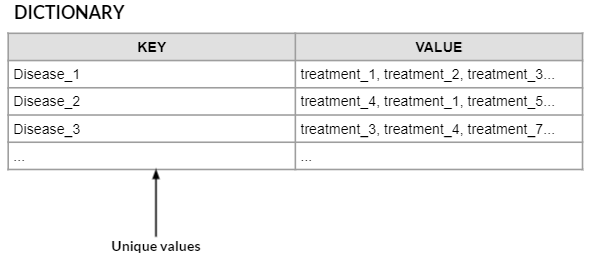

In [33]:
#Create a dictionary of key, value pair as disease and possible treatment
medical_dictionary = {}

for count, labels in enumerate(y_pred): # we are taking the Y-pred labels and count will have the record ID
    temp="".join(labels) # removing the spaces between the lablels
    #print(count, temp)
    totalD=len(re.findall('D',temp)) # find number of 'D' in the sentence
    totalT=len(re.findall('T',temp)) # find number of 'T' in the sentence
    if totalD>0 and totalT>0: # this means that the sentence has disease and treatment
        indexD=[];indexT=[];start_from=0 # Initializing variables used
        for i in range(totalD):
            foundat=temp.find('D',start_from) # search for 'D' from start_from in the labels
            indexD.append(foundat) # put the foundat index in a list called indexD
            start_from=foundat+1 # re-initialize start_from from the next word
        start_from=0 # initialize the same variable for 'T' labels now
        for i in range(totalT):
            foundat=temp.find('T',start_from) # search for 'T' from start_from in the labels
            indexT.append(foundat) # put the foundat index in a list called indexT
            start_from=foundat+1 # re-initialize start_from from the next word
        disease='' # Initialize the string disease with empty string
        for i in indexD: # Looping through the indexes where 'D' is located
            disease=disease+test_sentences[count].split()[i] # we are taking i-th word of the count which is index of sentence
            if i+1 not in indexD: # Check condition if the next word is also in the list
                disease=disease+', ' # this will be executed for a new disease
            else:
                disease=disease+' ' # this will be executed for continuation of disease name
        treatment='' # Initialize the string treatment with empty string
        for i in indexT: # Looping through the indexes where 'D' is located
            treatment=treatment+test_sentences[count].split()[i] # we are taking i-th word of the count which is index of sentence
            if i+1 not in indexT: # Check condition if the next word is also in the list
                treatment=treatment+', ' # this will be executed for a new treatment
            else:
                treatment=treatment+' ' # this will be executed for continuation of treatment
        # finally entering the disease and treatment in the dictionary after removing the last comma and space character
        medical_dictionary[disease.rstrip(', ')]=treatment.rstrip(', ') 
            
medical_dictionary

{'hereditary retinoblastoma': 'radiotherapy',
 'myocardial infarction': 'warfarin with 80 mg aspirin , or 1 mg warfarin with 80 mg aspirin',
 'unstable angina or non-Q-wave myocardial infarction': 'roxithromycin',
 'coronary-artery disease': 'Antichlamydial antibiotics',
 'primary pulmonary hypertension ( PPH )': 'fenfluramines',
 'foot infection': 'G-CSF treatment',
 "early Parkinson 's disease": 'Ropinirole monotherapy',
 'sore throat': 'Antibiotics',
 'abdominal tuberculosis': 'steroids',
 'female stress urinary incontinence': 'surgical treatment',
 'preeclampsia ( proteinuric hypertension )': 'intrauterine insemination with donor sperm versus intrauterine insemination',
 'intra-abdominal injury': 'senior surgery',
 'cancer': 'Matrix metalloproteinase inhibitors',
 'major pulmonary embolism': 'Thrombolytic treatment, right-side hemodynamics',
 'malignant pleural mesothelioma': 'chemotherapy',
 'tumor markers, pulmonary symptoms': 'chemotherapy',
 'non-obstructive azoospermia': 'test

### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [35]:
diseases_identified = list(medical_dictionary.keys())
index = 94 

print("Disease: ",diseases_identified[index])
print("Treatment:", medical_dictionary.get(diseases_identified[index]))

Disease:  cerebral palsy
Treatment: Hyperbaric oxygen therapy
